# Example of Data Analysis with DCD Hub Data

First, we import the Python SDK

In [1]:
from dcd.entities.thing import Thing

We provide the thing ID and access token (replace with yours)

In [2]:
from dotenv import load_dotenv
import os
load_dotenv()
THING_ID = os.environ['THING_ID']
THING_TOKEN = os.environ['THING_TOKEN']

We instantiate a Thing with its credential, then we fetch its details

In [3]:
my_thing = Thing(thing_id=THING_ID, token=THING_TOKEN)
my_thing.read()

INFO:dcd:things:my-test-thing-9b80:Initialising MQTT connection for Thing 'dcd:things:my-test-thing-9b80'
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
INFO:dcd:things:my-test-thing-9b80:Connection successful
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:my-test-thing-9b80 HTTP/1.1" 200 4728


DigiCertCA.crt exist.
{'thing': {'id': 'dcd:things:my-test-thing-9b80', 'name': 'My Test Thing', 'description': 'Just a Thing to test!', 'type': 'Test', 'properties': [{'type': 'THREE_DIMENSIONS', 'name': 'IMU', 'description': '', 'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}, {'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}], 'id': 'imu-dc94', 'classes': [], 'values': [], 'entityId': 'dcd:things:my-test-thing-9b80', 'readAt': 1571671792769, 'registeredAt': 1571056671000}, {'type': 'THREE_DIMENSIONS', 'name': 'IMU2 ', 'description': '', 'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Value2', 'description': '', 'unit': ''}, {'name': 'Value3', 'description': '', 'unit': ''}, {'name': 'Value1', 'description': '', 'unit': ''}, {'name': 'Valu

What does a Thing look like?

In [4]:
my_thing.to_json()

{'id': 'dcd:things:my-test-thing-9b80',
 'name': 'My Test Thing',
 'description': 'Just a Thing to test!',
 'type': 'Test',
 'properties': [{'id': 'imu-dc94',
   'name': 'IMU',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''},
    {'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''}]},
  {'id': 'imu2-1952',
   'name': 'IMU2 ',
   'description': '',
   'type': 'THREE_DIMENSIONS',
   'dimensions': [{'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': '', 'unit': ''},
    {'name': 'Value1', 'description': '', 'unit': ''},
    {'name': 'Value2', 'description': '', 'unit': ''},
    {'name': 'Value3', 'description': ''

Which property do we want to explore and over which time frame?

In [5]:
from datetime import datetime
# What dates?
START_DATE = "2019-10-21 16:47:00"
END_DATE = "2019-10-21 17:25:00"

from datetime import datetime
DATE_FORMAT = '%Y-%m-%d %H:%M:%S'
from_ts = datetime.timestamp(datetime.strptime(START_DATE, DATE_FORMAT)) * 1000
to_ts = datetime.timestamp(datetime.strptime(END_DATE, DATE_FORMAT)) * 1000

Let's find this property and read the data.

In [7]:
PROPERTY_NAME = "IMU2 "

my_property = my_thing.find_property_by_name(PROPERTY_NAME)
my_property.read(from_ts, to_ts)

DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): dwd.tudelft.nl:443
DEBUG:urllib3.connectionpool:https://dwd.tudelft.nl:443 "GET /api/things/dcd:things:my-test-thing-9b80/properties/imu2-1952?from=1571669220000.0&to=1571671500000.0 HTTP/1.1" 200 164123


How many data point did we get?

In [8]:
print(len(my_property.values))

2020


Display values

In [9]:
my_property.values

[[1571669296014, 9.82, 1.05, 2.04],
 [1571669296050, 9.82, 1.05, 2.04],
 [1571669296059, 9.55, 0.96, 1.88],
 [1571669296059, 9.47, 1.05, 1.85],
 [1571669296096, 9.55, 0.96, 1.88],
 [1571669296097, 9.47, 1.05, 1.85],
 [1571669296157, 9.56, 0.93, 1.95],
 [1571669296189, 9.56, 0.93, 1.95],
 [1571669296277, 9.54, 0.94, 1.86],
 [1571669296306, 9.54, 0.94, 1.86],
 [1571669296366, 9.52, 0.92, 1.96],
 [1571669296396, 9.52, 0.92, 1.96],
 [1571669296468, 9.54, 0.96, 1.89],
 [1571669296499, 9.54, 0.96, 1.89],
 [1571669296570, 9.51, 0.94, 1.95],
 [1571669296601, 9.51, 0.94, 1.95],
 [1571669296677, 9.54, 0.96, 1.89],
 [1571669296709, 9.54, 0.96, 1.89],
 [1571669296783, 9.52, 0.93, 1.92],
 [1571669296817, 9.52, 0.93, 1.92],
 [1571669296885, 9.53, 0.96, 1.88],
 [1571669296916, 9.53, 0.96, 1.88],
 [1571669296993, 9.55, 0.96, 1.91],
 [1571669297025, 9.55, 0.96, 1.91],
 [1571669297092, 9.55, 0.96, 1.9],
 [1571669297125, 9.55, 0.96, 1.9],
 [1571669297196, 9.53, 0.93, 1.9],
 [1571669297226, 9.53, 0.93, 1.

# From CSV

In [10]:
from numpy import genfromtxt
import pandas as pd
import numpy as np
data = np.array(my_property.values)
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')), columns = ['x', 'y', 'z'])
data_frame

DEBUG:matplotlib:$HOME=C:\Users\Caspe
DEBUG:matplotlib:CONFIGDIR=C:\Users\Caspe\.matplotlib
DEBUG:matplotlib:matplotlib data path: C:\Users\Caspe\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data
DEBUG:matplotlib:loaded rc file C:\Users\Caspe\AppData\Roaming\Python\Python37\site-packages\matplotlib\mpl-data\matplotlibrc
DEBUG:matplotlib:matplotlib version 3.1.1
DEBUG:matplotlib:interactive is False
DEBUG:matplotlib:platform is win32
DEBUG:matplotlib:loaded modules: ['sys', 'builtins', '_frozen_importlib', '_imp', '_thread', '_warnings', '_weakref', 'zipimport', '_frozen_importlib_external', '_io', 'marshal', 'nt', 'winreg', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_abc', '_bootlocale', '_locale', 'encodings.cp1252', 'site', 'os', 'stat', '_stat', 'ntpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'types', 'importlib', 'importlib._bootstrap', 'importlib._boots

,x,y,z
2019-10-21 14:48:16.014,9.82,1.05,2.04
2019-10-21 14:48:16.050,9.82,1.05,2.04
2019-10-21 14:48:16.059,9.55,0.96,1.88
2019-10-21 14:48:16.059,9.47,1.05,1.85
2019-10-21 14:48:16.096,9.55,0.96,1.88
2019-10-21 14:48:16.097,9.47,1.05,1.85
2019-10-21 14:48:16.157,9.56,0.93,1.95
2019-10-21 14:48:16.189,9.56,0.93,1.95
2019-10-21 14:48:16.277,9.54,0.94,1.86
2019-10-21 14:48:16.306,9.54,0.94,1.86


# Plot some charts with Matplotlib
In this example we plot an histogram, distribution of all values and dimensions.

In [12]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from numpy import ma
import numpy as np
data = np.array(my_property.values)

DEBUG:matplotlib:CACHEDIR=C:\Users\Caspe\.matplotlib
DEBUG:matplotlib.font_manager:Using fontManager instance from C:\Users\Caspe\.matplotlib\fontlist-v310.json
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.
DEBUG:matplotlib.pyplot:Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [11]:
figure(num=None, figsize=(15, 5))
t = data_frame.index
plt.plot(t, data_frame.x, t, data_frame.y, t, data_frame.z)

NameError: name 'figure' is not defined

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Serif' (DejaVuSerif-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXSizeFourSym' (STIXSizFourSymReg.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Oblique.ttf) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'STIXNonUni

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Georgia' (georgiai.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWIsop1' (swisop1.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans Typewriter' (LTYPEO.TTF) oblique normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft PhagsPa' (phagspa.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Minion Pro' (MinionPro-Regular.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Garamond' (GARAIT.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto' (Roboto-BoldItalic.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Book Antiqua' (ANTQUAB.TTF) normal normal book normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Luc

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Gadugi' (gadugi.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Averta Std' (AvertaStd-LightItalic.otf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'MS Reference Specialty' (REFSPCL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'SWGothg' (swgothg.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Adobe Arabic' (AdobeArabic-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Perpetua' (PERI____.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguibli.ttf) italic normal black normal>) = 11.525
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbi.ttf) italic normal roman normal>) = 11.145
DEBUG:matplotlib.font_manager:findfont: score(

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Source Sans Pro' (SourceSansPro-Semibold.otf) normal normal semibold normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Roboto' (Roboto-Regular.ttf) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bodoni MT' (BOD_PSTC.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Minion Pro' (MinionPro-BoldCnIt.otf) italic normal bold condensed>) = 11.535
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Sans' (LSANSD.TTF) normal normal roman normal>) = 10.145
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (pala.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kozuka Gothic Pro' (KozGoPro-ExtraLight.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Times New Roman' (timesbd.ttf) normal normal roman normal>) = 10.145
DEBUG:

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Colonna MT' (COLONNA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Bold.otf) normal normal 700 normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Adobe Myungjo Std' (AdobeMyungjoStd-Medium.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palatino Linotype' (palab.ttf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kozuka Gothic Pr6N' (KozGoPr6N-Medium.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Averta Std' (AvertaStd-ThinItalic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Myriad Pro' (MyriadPro-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Palace Script MT' (PALSCRI.TTF) normal normal 400 normal>) = 10.05

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Bauhaus 93' (BAUHS93.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Algerian' (ALGER.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Fax' (LFAX.TTF) normal normal regular normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Calibri' (calibrii.ttf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kozuka Mincho Pr6N' (kozminpr6n-regular.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Adobe Hebrew' (AdobeHebrew-Italic.otf) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Minion Pro' (MinionPro-Semibold.otf) normal normal semibold normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Verdana' (verdana.ttf) normal normal 400 normal>) = 3.6863636363636365
DEBUG:matplotlib.font_manager:findf

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trebuchet MS' (trebucbi.ttf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Ebrima' (ebrima.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Sans Serif' (micross.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Tekton Pro' (TektonPro-BoldExt.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Averta Std' (AvertaStd-Extrathin.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Imprint MT Shadow' (IMPRISHA.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Gothic' (GOTHICB.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Fax' (LFAXDI.TTF) italic normal demibold normal>) = 11.24
DEBUG:matplotlib.font_manager:findfo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Prestige Elite Std' (PrestigeEliteStd-Bd.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Chaparral Pro' (ChaparralPro-BoldIt.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Britannic Bold' (BRITANIC.TTF) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Franklin Gothic Book' (FRABK.TTF) normal normal book normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Microsoft Himalaya' (himalaya.ttf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Lucida Bright' (LBRITEI.TTF) italic normal 400 normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Century Schoolbook' (SCHLBKI.TTF) italic normal book normal>) = 11.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Candara' (Candarab.ttf) normal normal bold normal>) = 10.335
DEBUG:matplo

DEBUG:matplotlib.font_manager:findfont: score(<Font 'Segoe UI' (seguisli.ttf) italic normal light normal>) = 11.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Onyx' (ONYX.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Berlin Sans FB Demi' (BRLNSDB.TTF) normal normal demi normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Averta Std' (AvertaStd-BoldItalic.otf) italic normal bold normal>) = 11.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Dubai' (DUBAI-LIGHT.TTF) normal normal light normal>) = 10.24
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Stencil' (STENCIL.TTF) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Trajan Pro 3' (TrajanPro3-Bold.otf) normal normal bold normal>) = 10.335
DEBUG:matplotlib.font_manager:findfont: score(<Font 'Kozuka Mincho Pro' (KozMinPro-Medium.otf) normal normal 400 normal>) = 10.05
DEBUG:matplotlib.font_manager:findfont: score

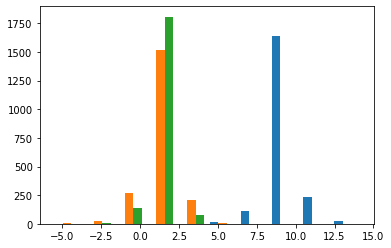

In [13]:
plt.hist(data[:,1:])
plt.show()

# Generate statistics with NumPy and Pandas

In [15]:
import numpy as np
from scipy.stats import kurtosis, skew

In [16]:
np.min(data[:,1:4], axis=0)

array([ 3.04, -5.67, -2.01])

In [17]:
skew(data[:,1:4])

array([-0.49186613, -0.52757733, -0.11635096])

You can select a column (slice) of data, or a subset of data. In the example below we select rows
from 10 to 20 (10 in total) and the colum 1 to x (i.e skiping the first column representing the time).

In [18]:
data[:10,1:]

array([[9.82, 1.05, 2.04],
       [9.82, 1.05, 2.04],
       [9.55, 0.96, 1.88],
       [9.47, 1.05, 1.85],
       [9.55, 0.96, 1.88],
       [9.47, 1.05, 1.85],
       [9.56, 0.93, 1.95],
       [9.56, 0.93, 1.95],
       [9.54, 0.94, 1.86],
       [9.54, 0.94, 1.86]])

Out of the box, Pandas give you some statistics, do not forget to convert your array into a DataFrame.

In [19]:
data_frame = pd.DataFrame(data[:,1:], index = pd.DatetimeIndex(pd.to_datetime(data[:,0], unit='ms')))
pd.DataFrame.describe(data_frame)

,0,1,2
count,2020.000000,2020.000000,2020.000000
mean,9.623218,1.100950,1.188020
std,0.935008,1.046878,0.657587
min,3.040000,-5.670000,-2.010000
25%,9.430000,0.710000,0.870000
50%,9.635000,1.035000,1.115000
75%,9.890000,1.650000,1.600000
max,14.280000,6.100000,4.270000


In [20]:
data_frame.rolling(10).std()

,0,1,2
2019-10-21 14:48:16.014,NaN,NaN,NaN
2019-10-21 14:48:16.050,NaN,NaN,NaN
2019-10-21 14:48:16.059,NaN,NaN,NaN
2019-10-21 14:48:16.059,NaN,NaN,NaN
2019-10-21 14:48:16.096,NaN,NaN,NaN
2019-10-21 14:48:16.097,NaN,NaN,NaN
2019-10-21 14:48:16.157,NaN,NaN,NaN
2019-10-21 14:48:16.189,NaN,NaN,NaN
2019-10-21 14:48:16.277,NaN,NaN,NaN
2019-10-21 14:48:16.306,0.126737,0.056016,0.075011


# Rolling / Sliding Window
To apply statistics on a sliding (or rolling) window, we can use the rolling() function of a data frame. In the example below, we roll with a window size of 4 elements to apply a skew()

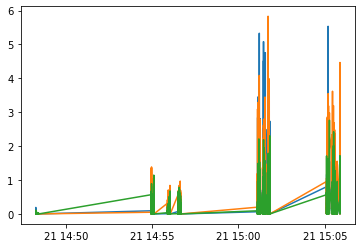

INFO:dcd:things:my-test-thing-9b80:Connection successful


In [33]:
rolling2s = data_frame.rolling(2).std()
plt.plot(rolling2s)
plt.show()

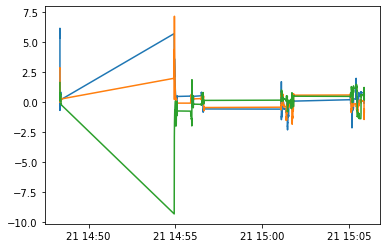

In [22]:
rolling100_data_points = data_frame.rolling(100).skew()
plt.plot(rolling100_data_points)
plt.show()

# Zero Crossing

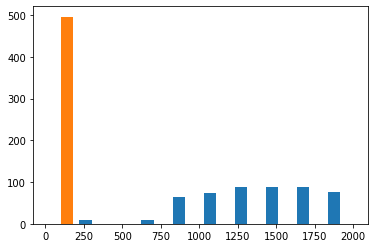

In [23]:
plt.hist(np.where(np.diff(np.sign(data[:,1:]))))
plt.show()

https://docs.scipy.org/doc/scipy/reference/stats.html#discrete-distributions